# Tensor shape

Here are constraints I introduced to the NSF project:

1. **Tensor shape**: assume all tensors are in shape **(batchsize, length, dim-1, dim-2, ...)**, where 
    * batchsize: batch size of a data batch;
    * length: maximum length of data sequences in the batch;
    * dim-1: dimension of feature vector in one frame;
    * dim-2: when a feature vector per frame has more than 1 dimensions;
   
   Length is equivalent to the number of frames, or number of waveform sampling points.
   
2. **Behavior**: hidden layers should not change **batchsize** and **length** of input tensors unless specified (e.g., down-sampling, up-sampling)
    


### 1. Examples on tensor shape

In [1]:
# At the begining, let's load packages 
from __future__ import absolute_import
from __future__ import print_function
import sys
import numpy as np
import torch

import tool_lib
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10, 5)


In [2]:
# load mel and F0
mel_dim = 80
input_mel = tool_lib.read_raw_mat("data_models/acoustic_features/slt_arctic_b0474.mfbsp", mel_dim)

# convert it into the required tensor format
input_mel_tensor = torch.tensor(input_mel).unsqueeze(0)

In [3]:
print("Shape of original data: " + str(input_mel.shape))
print("Shape of data as tensor: " + str(input_mel_tensor.shape))

Shape of original data: (554, 80)
Shape of data as tensor: torch.Size([1, 554, 80])


In [4]:
input_mel_tensor[0] - input_mel

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

### 2. Note

In this tutorial, we usually need to create tensors from the raw data. Then, we will manually add the dimension corresponding to batch.

When using project-NN-Pytorch-scripts, the default data io wrapped over [torch.utils.data.Dataset](https://pytorch.org/docs/stable/data.html#map-style-datasets) and [torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) will automatically create tensor in (batchsize, N, M).


When all the data files in the dataset have the same shape \[N, M\], the default IO can return a mini-batch (batchsize>1, N, M). Otherwise, it can only put a single sample in each mini-batch.

In this project, we only use batchsize=1 when we train the NSF models. 

### 3. Conventions

In summary, the tensor used by neural networks in this project should be in shape (batchsize, length, dim)

Occassionally, we wil use tensor of shape (batchsize, length, dim1, dim2), for example, complex-valued STFT spectral.

### 4. Misc

Here is one function to plot tensor

(<Figure size 115.2x187.2 with 2 Axes>,
  <matplotlib.axes._axes.Axes at 0x7ffb4cca0af0>])

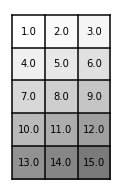

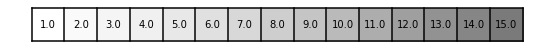

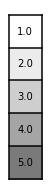

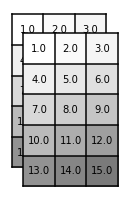

In [2]:
import plot_lib
import torch
data = torch.zeros([2, 5, 3])
data[0] = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12],[13,14,15]])
data[1] = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12],[13,14,15]])

plot_lib.plot_tensor(data[0:1], color_on_value=True)

plot_lib.plot_tensor(data[0:1].view(1, -1).unsqueeze(0), color_on_value=True)

plot_lib.plot_tensor(torch.tensor([[1,2,3,4,5]]).unsqueeze(0).permute(0, 2, 1), color_on_value=True)

plot_lib.plot_tensor(data, color_on_value=True, shift=0.1)